In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("aug_train.csv", encoding='utf-8')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
train.shape

(19158, 14)

In [4]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train)
profile.to_file(output_file='output.html')

In [5]:
profile

In [6]:
# identify unique numerical columns
train_num = train[['training_hours','city_development_index']]
print(train_num.shape)
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.95*(1-0.95)))
sel.fit(train_num)
train_num.drop(list(train_num.columns[~sel.get_support()]),axis=1,inplace=True)
print(train_num.shape)
train_num.columns

(19158, 2)
(19158, 1)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Index(['training_hours'], dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
enrollee_id               19158 non-null int64
city                      19158 non-null object
city_development_index    19158 non-null float64
gender                    14650 non-null object
relevent_experience       19158 non-null object
enrolled_university       18772 non-null object
education_level           18698 non-null object
major_discipline          16345 non-null object
experience                19093 non-null object
company_size              13220 non-null object
company_type              13018 non-null object
last_new_job              18735 non-null object
training_hours            19158 non-null int64
target                    19158 non-null float64
dtypes: float64(2), int64(2), object(10)
memory usage: 2.0+ MB


In [8]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
# fill missing entries
train['city'] = train['city'].fillna(value=0)
train['company_size'] = train['company_size'].fillna(value='NA')
train['company_type'] = train['company_type'].fillna(value='NA')
train['education_level'] = train['education_level'].fillna(value='NA')
train['enrolled_university'] = train['enrolled_university'].fillna(value='NA')
train['gender'] = train['gender'].fillna(value='NA')
train['last_new_job'] = train['last_new_job'].fillna(value=0)
train['major_discipline'] = train['major_discipline'].fillna(value='NA')
train['experience'] = train['experience'].fillna(value=0)

In [10]:
# to print list of columns with missing values
train.columns[train.isnull().any()].tolist()

[]

In [11]:
# to ensure we have all categorical variables covered for get_dummies
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [12]:
train1 = train[['city']]
train1['city1'] = train1['city'].str.replace('city_','')
train1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,city,city1
0,city_103,103
1,city_40,40
2,city_21,21
3,city_115,115
4,city_162,162


In [13]:
train1 = train.copy()
train1['city1'] = train1['city'].str.replace('city_','')
train1['city1'] = pd.to_numeric(train1['city1'])
train1 = train1.drop(['enrollee_id','city'],axis=1)
train1.education_level = train1.education_level.str.replace(' ','_')
train1.major_discipline = train1.major_discipline.str.replace(' ','_')
train1.company_type = train1.company_type.str.replace(' ','_')
train1.loc[train1.experience == '<1', 'experience'] = 0
train1.loc[train1.experience == '>20', 'experience'] = 21
#train1['experience'] = train1['experience'].fillna(value=0)
train1["experience"] = pd.to_numeric(train1["experience"])

train1.company_size = train1.company_size.str.replace('<','LE')
train1.company_size = train1.company_size.str.replace('/','to')
train1.company_size = train1.company_size.str.replace('+','G')
train1.company_size = train1.company_size.str.replace('-','to')
#train1['company_size'] = train1['company_size'].fillna(value='NA')

train1.last_new_job = train1.last_new_job.str.replace('>','GT')
#train1['last_new_job'] = train1['last_new_job'].fillna(value='NA')

#train1[['company_type','education_level','enrolled_university','gender','major_discipline']] = train1[['company_type','education_level','enrolled_university','gender','major_discipline']].fillna(value='NA')
train1 = pd.get_dummies(data=train1, columns=['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type','company_size','last_new_job'])

train1['city_development_index'] = pd.to_numeric(train1['city_development_index'])
train1.head()

,city_development_index,experience,training_hours,target,city1,gender_Female,gender_Male,gender_NA,gender_Other,relevent_experience_Has relevent experience,...,company_size_500to999,company_size_50to99,company_size_LE10,company_size_NA,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_GT4,last_new_job_never
0,0.920,21,36,1.0,103,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,0.776,15,47,0.0,40,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.624,5,83,0.0,21,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.789,0,52,1.0,115,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.767,21,8,0.0,162,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [14]:
train1.shape

(19158, 50)

In [15]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 50 columns):
city_development_index                         19158 non-null float64
experience                                     19158 non-null int64
training_hours                                 19158 non-null int64
target                                         19158 non-null float64
city1                                          19158 non-null int64
gender_Female                                  19158 non-null uint8
gender_Male                                    19158 non-null uint8
gender_NA                                      19158 non-null uint8
gender_Other                                   19158 non-null uint8
relevent_experience_Has relevent experience    19158 non-null uint8
relevent_experience_No relevent experience     19158 non-null uint8
enrolled_university_Full time course           19158 non-null uint8
enrolled_university_NA                         19158 non-null uint8
enr

In [16]:
# to print list of columns with missing values
train1.columns[train1.isnull().any()].tolist()

[]

In [17]:
# Standardize ??

In [18]:
train1['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(train1, test_size=0.2)
print(train.shape, test.shape)

(15326, 50) (3832, 50)


In [20]:
train.head()

,city_development_index,experience,training_hours,target,city1,gender_Female,gender_Male,gender_NA,gender_Other,relevent_experience_Has relevent experience,...,company_size_500to999,company_size_50to99,company_size_LE10,company_size_NA,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_GT4,last_new_job_never
11937,0.910,5,26,0.0,16,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4913,0.895,21,22,0.0,10,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
13297,0.624,11,147,1.0,21,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2300,0.920,14,77,0.0,160,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
16482,0.920,13,87,1.0,103,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0


In [21]:
X_train = train.loc[:, train.columns != 'target']
X_train.head()

,city_development_index,experience,training_hours,city1,gender_Female,gender_Male,gender_NA,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,...,company_size_500to999,company_size_50to99,company_size_LE10,company_size_NA,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_GT4,last_new_job_never
11937,0.910,5,26,16,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4913,0.895,21,22,10,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
13297,0.624,11,147,21,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2300,0.920,14,77,160,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
16482,0.920,13,87,103,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0


In [22]:
y_train = train[['target']]
y_train.head()

,target
11937,0.0
4913,0.0
13297,1.0
2300,0.0
16482,1.0


In [23]:
X_test = test.loc[:, test.columns != 'target']
X_test.head()

,city_development_index,experience,training_hours,city1,gender_Female,gender_Male,gender_NA,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,...,company_size_500to999,company_size_50to99,company_size_LE10,company_size_NA,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_GT4,last_new_job_never
3895,0.579,6,200,74,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
16532,0.884,21,28,71,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
5101,0.926,9,10,114,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
14585,0.682,5,29,19,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1380,0.920,6,246,103,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
y_test = test[['target']]
y_test.head()

,target
3895,1.0
16532,0.0
5101,0.0
14585,0.0
1380,0.0


In [25]:
def check_metrics(model, input_y):
    from itertools import islice
    from sklearn.metrics import r2_score, accuracy_score, auc, confusion_matrix, roc_auc_score, precision_score, recall_score
    result_list=[]
    for item in model:
        result_list.append(item[1])
    result_list_r = []
    for item in model:
        result_list_r.append(item[1].round())
    result_cf = confusion_matrix(input_y, result_list_r)
    print(result_cf)
    print('Precision: '+str(precision_score(input_y, result_list_r)))
    print('Recall: '+str(recall_score(input_y, result_list_r)))
    print('Accuracy: '+str(accuracy_score(input_y, result_list_r)))
    print('R2: '+str(r2_score(input_y, result_list)))
    print('AUC: '+str(roc_auc_score(input_y, result_list)))

In [26]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train, y_train)
LR.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
LR.score(X_test, y_test) #mean accuracy

0.7674843423799582

In [28]:
LR_pp = LR.predict_proba(X_test)
LR_pp

array([[0.53350696, 0.46649304],
       [0.70547919, 0.29452081],
       [0.87064563, 0.12935437],
       ...,
       [0.91638469, 0.08361531],
       [0.96395901, 0.03604099],
       [0.51865037, 0.48134963]])

In [29]:
check_metrics(LR_pp, y_test)

[[2688  177]
 [ 714  253]]
Precision: 0.5883720930232558
Recall: 0.26163391933815927
Accuracy: 0.7674843423799582
R2: 0.18932589546492762
AUC: 0.7787771322761061


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rf_auc_list=[]
for i in [5,10,15,20,25,30]:
    rf = RandomForestClassifier(n_estimators=1000, random_state=42, criterion='gini', max_depth=i, max_features=20)
    rf.fit(X_train, y_train)
    rf_p = rf.predict(X_test)
    rf_auc_list.append(roc_auc_score(rf_p, y_test))
rf_auc_list

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A col

[0.7227368792975155,
 0.7367631997020501,
 0.724357470045355,
 0.7203729796262105,
 0.7181319972722638,
 0.7157611480441692]

Text(0, 0.5, 'AUC')

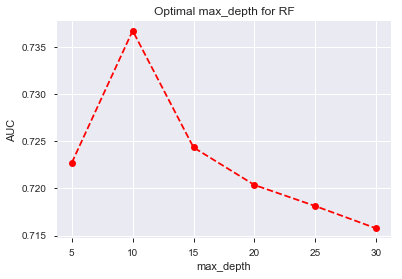

In [41]:
import matplotlib.pyplot as plt
max_depth_list=[5,10,15,20,25,30]
plt.plot(max_depth_list, rf_auc_list, color='r', linestyle='dashed',
         marker='o')
plt.title('Optimal max_depth for RF')
plt.xlabel('max_depth')
plt.ylabel('AUC')

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
rf_auc_list=[]
for i in [5,10,15,20,25,30]:
    rf = RandomForestClassifier(n_estimators=1000, random_state=42, criterion='gini', min_samples_leaf=i)
    rf.fit(X_train, y_train)
    rf_p = rf.predict(X_test)
    rf_auc_list.append(roc_auc_score(rf_p, y_test))
rf_auc_list

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A col

[0.735958872939096,
 0.7344488028060602,
 0.7304503120547959,
 0.7291056019723327,
 0.7251022080501645,
 0.7234877628022398]

Text(0, 0.5, 'AUC')

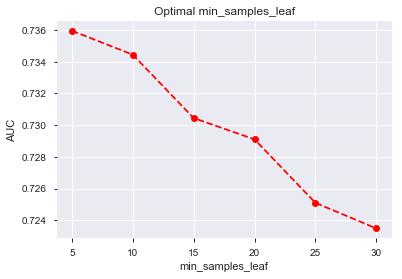

In [39]:
import matplotlib.pyplot as plt
min_samples_leaf = [5,10,15,20,25,30]
plt.plot(min_samples_leaf, rf_auc_list, color='r', linestyle='dashed', marker='o')
plt.title('Optimal min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('AUC')

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42, criterion='gini', max_features=20, max_depth=10, min_samples_leaf=5)
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [43]:
rf_p = rf.predict_proba(X_test)
rf_p

array([[0.43876976, 0.56123024],
       [0.79748097, 0.20251903],
       [0.91800551, 0.08199449],
       ...,
       [0.93207079, 0.06792921],
       [0.87125294, 0.12874706],
       [0.45046477, 0.54953523]])

In [44]:
check_metrics(rf_p, y_test)

[[2495  370]
 [ 379  588]]
Precision: 0.6137787056367432
Recall: 0.6080661840744571
Accuracy: 0.8045407098121086
R2: 0.26600832354829396
AUC: 0.8030532890806744


In [53]:
test = pd.read_csv("aug_test.csv", encoding='utf-8')
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [54]:
# fill missing entries
test['city'] = test['city'].fillna(value=0)
test['company_size'] = test['company_size'].fillna(value='NA')
test['company_type'] = test['company_type'].fillna(value='NA')
test['education_level'] = test['education_level'].fillna(value='NA')
test['enrolled_university'] = test['enrolled_university'].fillna(value='NA')
test['gender'] = test['gender'].fillna(value='NA')
test['last_new_job'] = test['last_new_job'].fillna(value=0)
test['major_discipline'] = test['major_discipline'].fillna(value='NA')
test['experience'] = test['experience'].fillna(value=0)

test1 = test.copy()
test1['city1'] = test1['city'].str.replace('city_','')
test1['city1'] = pd.to_numeric(test1['city1'])
test1 = test1.drop(['enrollee_id','city'],axis=1)
test1.education_level = test1.education_level.str.replace(' ','_')
test1.major_discipline = test1.major_discipline.str.replace(' ','_')
test1.company_type = test1.company_type.str.replace(' ','_')
test1.loc[test1.experience == '<1', 'experience'] = 0
test1.loc[test1.experience == '>20', 'experience'] = 21
#test1['experience'] = test1['experience'].fillna(value=0)
test1["experience"] = pd.to_numeric(test1["experience"])

test1.company_size = test1.company_size.str.replace('<','LE')
test1.company_size = test1.company_size.str.replace('/','to')
test1.company_size = test1.company_size.str.replace('+','G')
test1.company_size = test1.company_size.str.replace('-','to')
#test1['company_size'] = test1['company_size'].fillna(value='NA')

test1.last_new_job = test1.last_new_job.str.replace('>','GT')
#test1['last_new_job'] = test1['last_new_job'].fillna(value='NA')

#test1[['company_type','education_level','enrolled_university','gender','major_discipline']] = test1[['company_type','education_level','enrolled_university','gender','major_discipline']].fillna(value='NA')
test1 = pd.get_dummies(data=test1, columns=['gender','relevent_experience','enrolled_university','education_level','major_discipline','company_type','company_size','last_new_job'])

test1['city_development_index'] = pd.to_numeric(test1['city_development_index'])
test1.head()

,city_development_index,experience,training_hours,city1,gender_Female,gender_Male,gender_NA,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,...,company_size_500to999,company_size_50to99,company_size_LE10,company_size_NA,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_GT4,last_new_job_never
0,0.827,9,21,41,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0.920,5,98,103,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0.624,0,15,21,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0.827,11,39,13,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0.920,21,72,103,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
test_predict = pd.DataFrame(rf.predict(test1))
test_predict.columns = ['target']
test_predict

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,1.0
8,0.0
9,1.0


In [61]:
test_predict.to_csv("submission 20210107.csv", index=False)